# Time Stamp Extract

Brief 1-2 sentence description of notebook.

- Notebook that extracts the timestamps and gets the time that tones played

In [1]:
# Imports of all used packages and libraries
import os
import sys
import glob

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# setting path
sys.path.append('../../src')

In [4]:
import trodes.read_exported

## Inputs & Data

- Explanation of each input and where it comes from.

Inputs and Required data loading
- input variable names are in all caps snake case
- Whenever an input changes or is used for processing 
- The variables are all lower in snake case

In [5]:
# Path of the directory that contains the Spike Gadgets recording and the exported timestamp files
# Exported with this tool https://docs.spikegadgets.com/en/latest/basic/ExportFunctions.html
# Export these files:
    # -raw – Continuous raw band export.
    # -dio – Digital IO channel state change export.
    # -analogio – Continuous analog IO export.
INPUT_DIR = "/scratch/back_up/reward_competition_extention/data/omission/2023_06_18/20230618_100636_standard_comp_to_omission_D2_subj_1-4_and_1-1.rec"
OUTPUT_DIR = r"./proc" # where data is saved should always be shown in the inputs
os.makedirs(OUTPUT_DIR, exist_ok=True)

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Other documentation

raw directory
- raw_group0.dat
    - voltage_value: Array with voltage measurement for each channel at each timestamp
- timestamps.dat
    - voltage_time_stamp: The time stamp of each voltage measurement

parent directory
- 1.videoTimeStamps.cameraHWSync
    - frame_number: Calculated by getting the index of each video time stamp tuple 
    - PosTimestamp: The time stamp of each video frame
    - HWframeCount: Unknown value. Starts at 30742 and increases by 1 for each tuple  
    - HWTimestamp: Unknown value. All zeroes
    - video_time: Calculated by dividing the frame number by the fps(frames per second) 
    - video_seconds: video_time, but rounded to seconds  	
    - These are filled in versions of the above collumns with the value from the most recent previous cell
        - filled_PosTimestamp 	
        - filledHWframeCount 	
        - filled_frame_number 	
        - filled_video_time 	
        - filled_video_seconds 	

DIO directory
- dio_ECU_Din1.dat
    - time: The time stamp the corresponds to the DIN input
    - state: Binary state of whether there is input from DIN or not 	
    - trial_number: Calculated by adding 1 to every time there is a DIN input
    - These are filled in versions of the above collumns with the value from the most recent previous cell
        - filled_state 	
        - filled_trial_number

ss_output directory (Spike sorting with Spike interface)
- firings.npz
    - unit_id: All the units that had a spike train for the given timestamp 	
    - number_of_units: Calculated by counting the number of units that had a spike train

## Functions

- function names are short and in snake case all lowercase
- a function name should be unique but does not have to describe the function
- doc strings describe functions not function names

In [6]:
def find_closest_index(sorted_list=None, target=0):
    """
    Returns the index of the number in the sorted list that is closest to the target.

    This function performs a binary search on a sorted list to find the closest number to 
    a given target. If the target exists in the list, its index is returned. If not, the 
    function will return the index of the number that's closest to the target.

    Parameters:
    - sorted_list (list[int or float]): A sorted list of numbers.
    - target (int or float): The target number to find the closest value to.

    Returns:
    - int: The index of the closest number in the sorted list to the target. 
           If the sorted list is empty, returns None.

    Example:
    >>> sorted_nums = [1, 3, 5, 8, 10, 15, 18, 20, 24, 27, 30]
    >>> find_closest_index(sorted_nums, 6)
    2

    Note:
    The list should be sorted in ascending order.
    """
    
    if sorted_list is None:
        return None
    if target <= sorted_list[0]:
        return 0
    if target >= sorted_list[-1]:
        return len(sorted_list) - 1

    # Binary search
    left, right = 0, len(sorted_list) - 1
    while left <= right:
        mid = (left + right) // 2

        if sorted_list[mid] == target:
            return mid
        elif sorted_list[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    # After binary search, the target will be between sorted_list[right] and sorted_list[left]
    # We compare the two to see which one is closer to the target and return its index
    if abs(sorted_list[left] - target) < abs(sorted_list[right] - target):
        return left
    else:
        return right

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [7]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

In [8]:
recording_basename = os.path.splitext(os.path.basename(INPUT_DIR))[0]

In [9]:
output_recording_path = os.path.join(OUTPUT_DIR, recording_basename)

In [10]:
output_recording_path

'./proc/20230618_100636_standard_comp_to_omission_D2_subj_1-4_and_1-1'

In [11]:
os.makedirs((output_recording_path), exist_ok=True)

In [12]:
file_to_data = trodes.read_exported.organize_all_trodes_export(INPUT_DIR)

/nancy/projects/reward_competition_extention/results/2023_08_07_analysis_refactoring/../../src/trodes/read_exported.py:62: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dtype_spec)


Skipping file 20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged.timestampoffset.txt due to error: Settings format not supported
Skipping file 20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged.timestampoffset.txt due to error: Settings format not supported


- All the folders that were extracted
    - These folders would correspond to each recording that was recorded

In [13]:
file_to_data.keys()

dict_keys(['20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged', '20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged'])

In [14]:
recording_names = list(file_to_data.keys())

In [15]:
recording_names

['20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged',
 '20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged']

### Extracting the timestamps for the raw ephys recording

- All the subfolders that were extracted from a given recording

In [16]:
file_to_data[recording_names[0]]["raw"]

{'raw_group0': {'description': 'Raw (unfiltered) data for one sorting group',
  'byte_order': 'little endian',
  'original_file': '20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged.rec',
  'clockrate': '20000',
  'trodes_version': '2.4.0',
  'compile_date': 'May 24 2023',
  'compile_time': '10:11:04',
  'qt_version': '6.2.2',
  'commit_tag': 'heads/Release_2.4.0-0-g1eecf3b7',
  'controller_firmware': '3.17',
  'headstage_firmware': '2.2',
  'controller_serialnum': '00104 00176',
  'headstage_serialnum': '01601 00129',
  'autosettle': '0',
  'smartref': '0',
  'gyro': '0',
  'accelerometer': '0',
  'magnetometer': '0',
  'time_offset': '0',
  'system_time_at_creation': '1687097219606',
  'timestamp_at_creation': '489210',
  'first_timestamp': '835680',
  'sorting_group': '0',
  'num_channels': '32',
  'voltage_scaling': '0.195',
  'fields': '<voltage 32*int16>',
  'data': array([([-600, -504, -547, -973, -731, -587, -222, -668, -476, -525, -536, -565, -707, -654, -

In [17]:
voltage_timestamp_array = file_to_data[recording_names[0]]["raw"]["timestamps"]["data"]

In [18]:
voltage_timestamp_array.shape

(65603942,)

In [19]:
print(voltage_timestamp_array[:10])

[(835680,) (835681,) (835682,) (835683,) (835684,) (835685,) (835686,)
 (835687,) (835688,) (835689,)]


In [20]:
print(voltage_timestamp_array[-10:])

[(66439612,) (66439613,) (66439614,) (66439615,) (66439616,) (66439617,)
 (66439618,) (66439619,) (66439620,) (66439621,)]


### Extracting the change in ECU states

In [21]:
recording_names

['20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged',
 '20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged']

20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged
dio_ECU_Din1


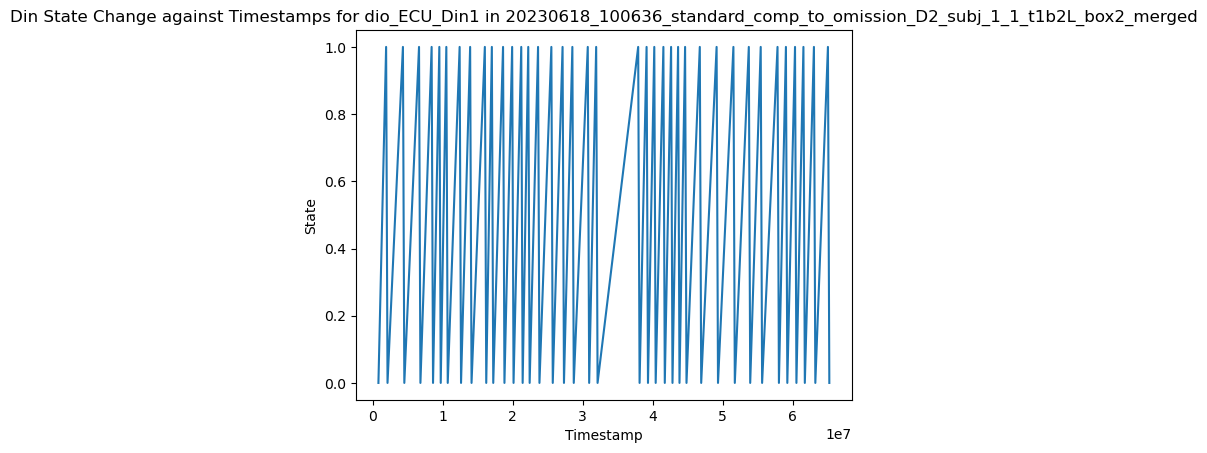

dio_ECU_Din4


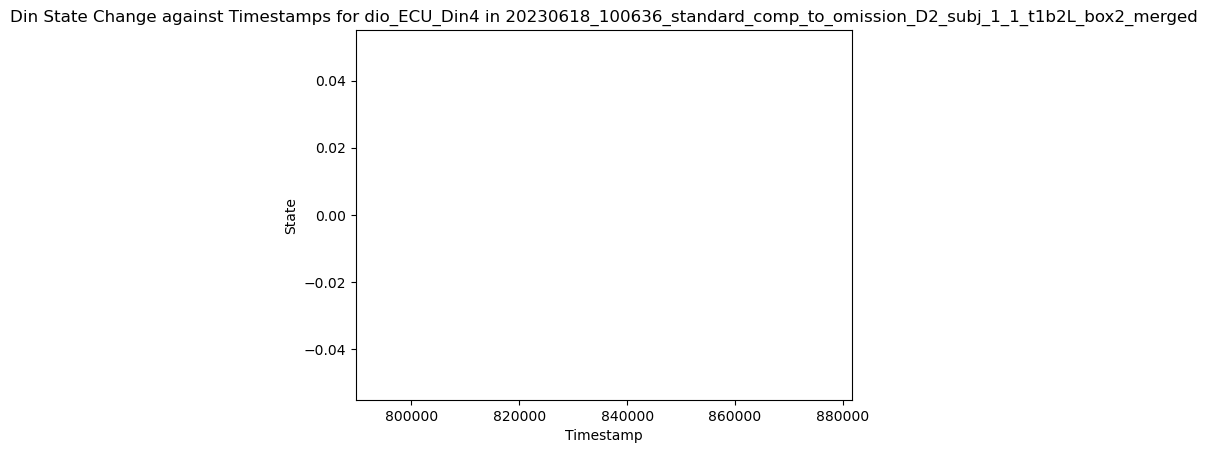

dio_ECU_Din3


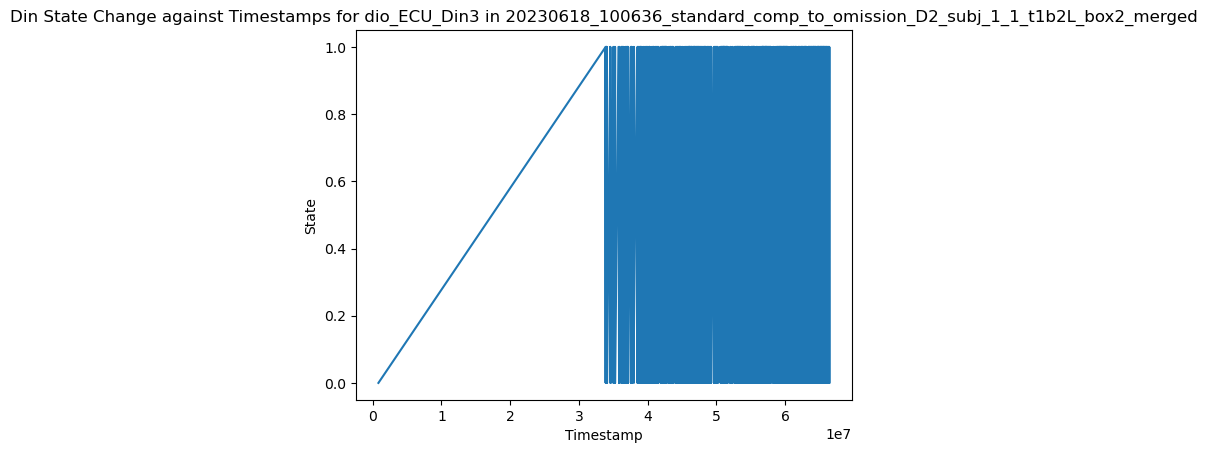

dio_ECU_Din2


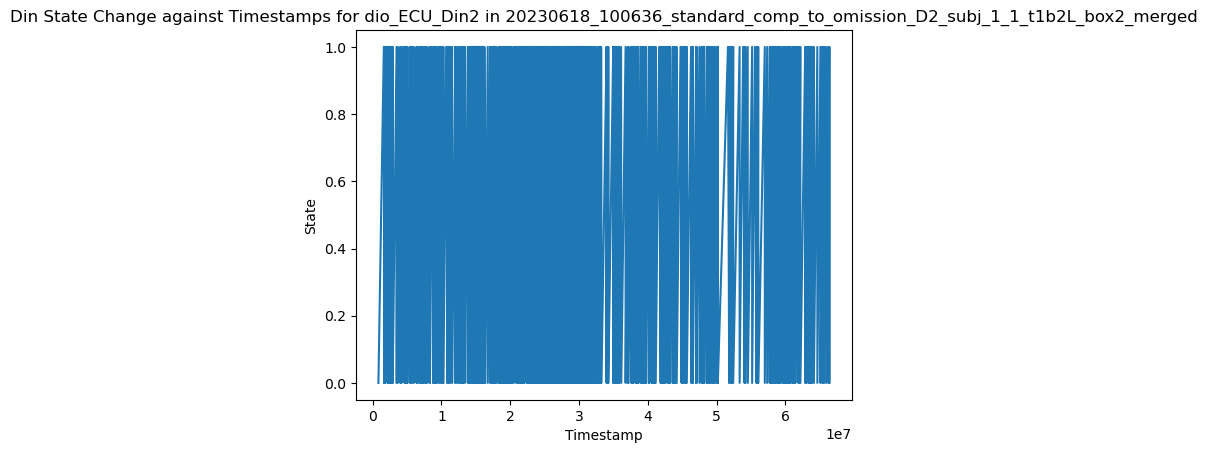

20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged
dio_ECU_Din2


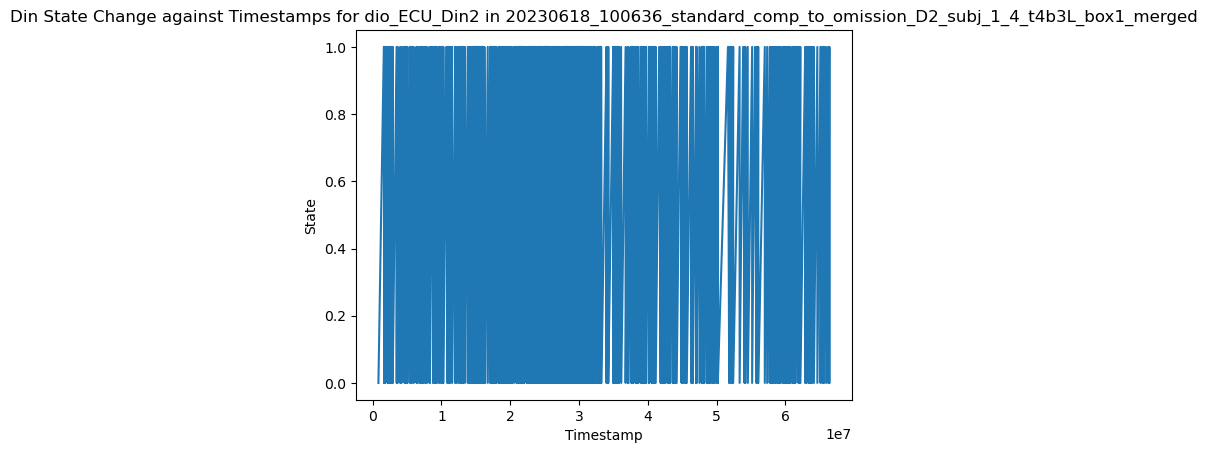

dio_ECU_Din3


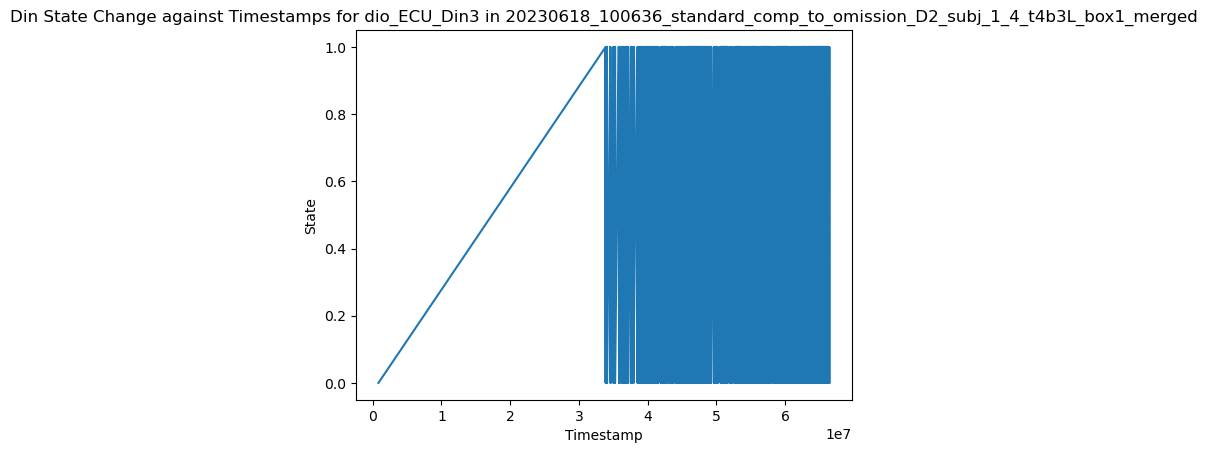

dio_ECU_Din4


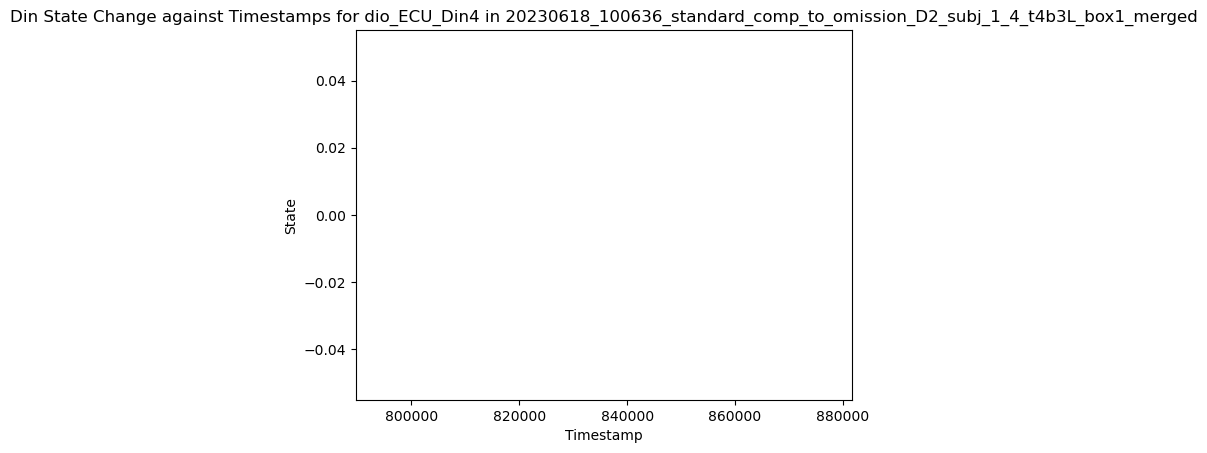

dio_ECU_Din1


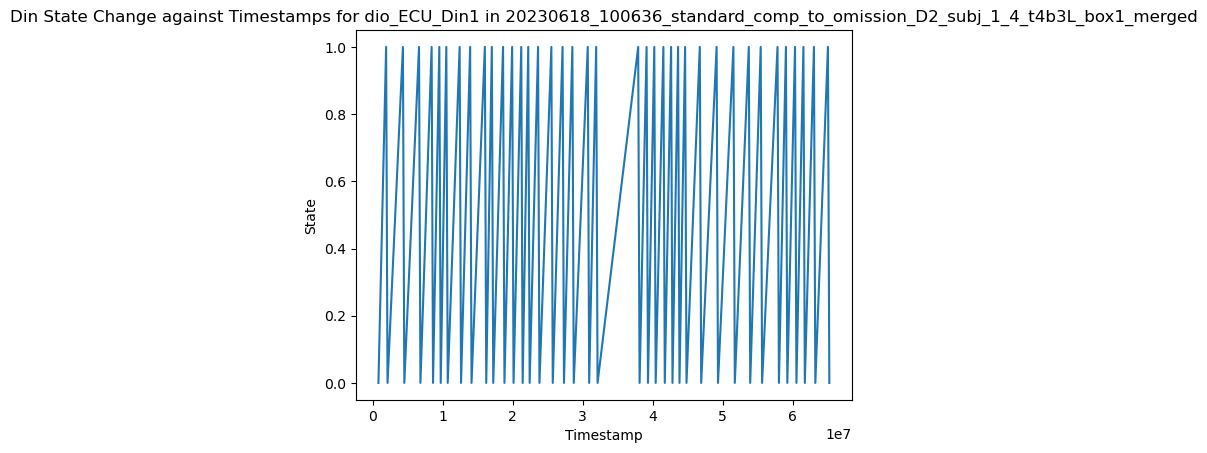

In [22]:
all_din_state_df = []

for recording in recording_names:
    print(recording)
    for key, value in file_to_data[recording]["DIO"].items():
        if "in" in key:
            print(key)
            din_state_array = file_to_data[recording_names[0]]["DIO"][key]["data"]
            current_din_state_df = pd.DataFrame(din_state_array)
            current_din_state_df["recording_dir"] = recording_basename
            current_din_state_df["recording_file"] = recording
            current_din_state_df["din"] = key
            all_din_state_df.append(current_din_state_df)
            plt.plot([tup[0] for tup in din_state_array], [tup[1] for tup in din_state_array])
            plt.xlabel("Timestamp")
            plt.ylabel("State")
            plt.title("Din State Change against Timestamps for {} in {}".format(key, recording))
            plt.show()

In [23]:
concatted_din_state_df = pd.concat(all_din_state_df)

In [24]:
concatted_din_state_df = pd.concat(all_din_state_df).sort_values(by=["recording_file", "din"]).reset_index(drop=True)

In [25]:
concatted_din_state_df["time_stamp_index"] = concatted_din_state_df["time"] - voltage_timestamp_array[0][0]

In [25]:
concatted_din_state_df["time_stamp_index"] = concatted_din_state_df["time"] - voltage_timestamp_array[0][0]

In [26]:
concatted_din_state_df.head()

,time,state,recording_dir,recording_file,din,time_stamp_index
0,835680,0,20230618_100636_standard_comp_to_omission_D2_s...,20230618_100636_standard_comp_to_omission_D2_s...,dio_ECU_Din1,0
1,1934930,1,20230618_100636_standard_comp_to_omission_D2_s...,20230618_100636_standard_comp_to_omission_D2_s...,dio_ECU_Din1,1099250
2,2134930,0,20230618_100636_standard_comp_to_omission_D2_s...,20230618_100636_standard_comp_to_omission_D2_s...,dio_ECU_Din1,1299250
3,4334936,1,20230618_100636_standard_comp_to_omission_D2_s...,20230618_100636_standard_comp_to_omission_D2_s...,dio_ECU_Din1,3499256
4,4534932,0,20230618_100636_standard_comp_to_omission_D2_s...,20230618_100636_standard_comp_to_omission_D2_s...,dio_ECU_Din1,3699252


In [27]:
concatted_din_state_df.tail()

,time,state,recording_dir,recording_file,din,time_stamp_index
7291,66433509,1,20230618_100636_standard_comp_to_omission_D2_s...,20230618_100636_standard_comp_to_omission_D2_s...,dio_ECU_Din3,65597829
7292,66434509,0,20230618_100636_standard_comp_to_omission_D2_s...,20230618_100636_standard_comp_to_omission_D2_s...,dio_ECU_Din3,65598829
7293,66435106,1,20230618_100636_standard_comp_to_omission_D2_s...,20230618_100636_standard_comp_to_omission_D2_s...,dio_ECU_Din3,65599426
7294,66437909,0,20230618_100636_standard_comp_to_omission_D2_s...,20230618_100636_standard_comp_to_omission_D2_s...,dio_ECU_Din3,65602229
7295,835680,0,20230618_100636_standard_comp_to_omission_D2_s...,20230618_100636_standard_comp_to_omission_D2_s...,dio_ECU_Din4,0


## Extracting the video frame timestamps

In [28]:
file_to_video_timestamps = {}
for video_timestamps in glob.glob(os.path.join(INPUT_DIR, "*cameraHWSync")):
    timestamp_array = trodes.read_exported.read_trodes_extracted_data_file(video_timestamps)["data"]["PosTimestamp"]
    file_to_video_timestamps[os.path.basename(video_timestamps)] = timestamp_array
    concatted_din_state_df[os.path.basename(video_timestamps)] = concatted_din_state_df["time"].apply(lambda x: find_closest_index(sorted_list=timestamp_array, target=x))




/nancy/projects/reward_competition_extention/results/2023_08_07_analysis_refactoring/../../src/trodes/read_exported.py:62: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dtype_spec)
/nancy/projects/reward_competition_extention/results/2023_08_07_analysis_refactoring/../../src/trodes/read_exported.py:62: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dtype_spec)


In [29]:
concatted_din_state_df.head()

,time,state,recording_dir,recording_file,din,time_stamp_index,20230618_100636_standard_comp_to_omission_D2_subj_1-4_and_1-1.1.videoTimeStamps.cameraHWSync,20230618_100636_standard_comp_to_omission_D2_subj_1-4_and_1-1.2.videoTimeStamps.cameraHWSync
0,835680,0,20230618_100636_standard_comp_to_omission_D2_s...,20230618_100636_standard_comp_to_omission_D2_s...,dio_ECU_Din1,0,0,0
1,1934930,1,20230618_100636_standard_comp_to_omission_D2_s...,20230618_100636_standard_comp_to_omission_D2_s...,dio_ECU_Din1,1099250,1097,1097
2,2134930,0,20230618_100636_standard_comp_to_omission_D2_s...,20230618_100636_standard_comp_to_omission_D2_s...,dio_ECU_Din1,1299250,1296,1296
3,4334936,1,20230618_100636_standard_comp_to_omission_D2_s...,20230618_100636_standard_comp_to_omission_D2_s...,dio_ECU_Din1,3499256,3492,3492
4,4534932,0,20230618_100636_standard_comp_to_omission_D2_s...,20230618_100636_standard_comp_to_omission_D2_s...,dio_ECU_Din1,3699252,3692,3692


- Saving the time stamps of each video frame into a dataframe separately

In [30]:
# Find the maximum length of the arrays in the dictionary
max_length = max(map(len, file_to_video_timestamps.values()))

# Pad each array with NaN values to make them all the same length
padded_data = {k: np.pad(v, (0, max_length - len(v)), mode='constant', constant_values=np.nan) for k, v in file_to_video_timestamps.items()}

# Convert the padded data to a dataframe
video_timestamp_df = pd.DataFrame(padded_data)

/home/riwata/miniconda3/envs/spike_interface_0_97_1/lib/python3.9/site-packages/numpy/lib/arraypad.py:147: RuntimeWarning: invalid value encountered in cast
  padded[left_slice] = value_pair[0]
/home/riwata/miniconda3/envs/spike_interface_0_97_1/lib/python3.9/site-packages/numpy/lib/arraypad.py:151: RuntimeWarning: invalid value encountered in cast
  padded[right_slice] = value_pair[1]


In [31]:
video_timestamp_df.head()

,20230618_100636_standard_comp_to_omission_D2_subj_1-4_and_1-1.1.videoTimeStamps.cameraHWSync,20230618_100636_standard_comp_to_omission_D2_subj_1-4_and_1-1.2.videoTimeStamps.cameraHWSync
0,835678,835678
1,837064,837064
2,838450,838450
3,838450,838921
4,839835,839835


In [32]:
concatted_din_state_df.to_csv(os.path.join(output_recording_path, "{}.event_timestamp.csv".format(recording_basename)))

In [33]:
video_timestamp_df.to_csv(os.path.join(output_recording_path, "{}.frame_timestamp.csv".format(recording_basename)))